In [1]:
# Colour Wheel

from functions import *
from adjustText import adjust_text

# ------------------- GALILEO -------------------
# load orbit data

galileo_wrt_callisto_cphio_CA = closest_approach_data_G("galileo", "callisto", "cphio", "G")
callisto_wrt_jupiter_cphio_CA = closest_approach_data_G("callisto", "jupiter", "cphio", "G")
callisto_wrt_jupiter_JSO_CA = closest_approach_data_G("callisto", "jupiter", "jupsunorb", "G")
sun_wrt_callisto_cphio_CA = closest_approach_data_G("sun", "callisto", "cphio", "G")
callisto_wrt_jupiter_SIII_mag_CA = closest_approach_data_G("callisto", "jupiter", "SIII_mag", "G")
jupiter_wrt_sun_IAU_CA = closest_approach_data_G('jupiter', 'sun', 'IAU_SUN', 'G')


# get jupiter-sun angles
azimuthal = []
for orbit, vector in jupiter_wrt_sun_IAU_CA.items():
    azimuthal.append(np.degrees(vector[6]))

# get sun-galileo angle
sun_cphio_vector = []
for orbit, vector in sun_wrt_callisto_cphio_CA.items():
    sun_cphio_vector.append(vector[1:4])

galileo_cphio_vector = []
for orbit, vector in galileo_wrt_callisto_cphio_CA.items():
    galileo_cphio_vector.append(vector[1:4])

sun_galileo_angle = []
for i in range(len(sun_cphio_vector)):
    angle = angle_between(sun_cphio_vector[i], galileo_cphio_vector[i])
    sun_galileo_angle.append(angle)


# Data for the colour wheel
xval = np.arange(-np.pi, np.pi, 0.01)
yval = np.ones_like(xval)

colormap = plt.get_cmap('hsv_r')
norm = mpl.colors.Normalize(-np.pi, np.pi)


# Plot
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)

# Defining and applying the common limits
lim = 30

common_xlim = (-lim, lim)  
common_ylim = (-lim, lim) 

ax1.set_xlim(common_xlim)
ax1.set_ylim(common_ylim)

# Set axis labels
ax1.set_xlabel('x [$R_J$]')
ax1.set_ylabel('y [$R_J$]')

# plot jupiter
jup = plt.Circle((0, 0), 1, color='xkcd:dull brown')
ax1.add_patch(jup)
ax1.annotate('Jupiter', (-2,-3))

dayside_marker = mlines.Line2D([], [], color='black', marker='*', linestyle='None', markersize=10, label='Dayside')
nightside_marker = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label='Nightside')

texts = []
i = 0

for orbit, vector in callisto_wrt_jupiter_JSO_CA.items():

    if sun_galileo_angle[i] > 90:
        s = ax1.scatter(vector[1] / R_J, vector[2] / R_J, c=azimuthal[i], vmin=min(azimuthal), vmax=max(azimuthal), s=80, cmap=colormap, marker='*')
    else:
        s = ax1.scatter(vector[1] / R_J, vector[2] / R_J, c=azimuthal[i], vmin=min(azimuthal), vmax=max(azimuthal), s=30, cmap=colormap)

    i += 1
    texts.append(ax1.text(vector[1] / R_J, vector[2] / R_J, 'C%s' % i)) # save orbit labels in list

# Adjust the positions of annotations so they don't overlap
adjust_text(texts)

# colourbar
#cbar = fig.colorbar(s)
#cbar.set_title('Jupiter-Sun Angle in IAU_SUN [degrees]')

legend = ax1.legend(handles=[dayside_marker, nightside_marker], loc='lower left')
ax1.set_title('Closest Approaches in JSO')

ax2 = plt.subplot(122, projection = 'polar')
ax2.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax2.scatter(0,0, color='gold')

labels =[]
for i in range(len(azimuthal)):
    if sun_galileo_angle[i] > 90:
        ax2.scatter(azimuthal[i], 1, color='black', marker='*')
    else:
        ax2.scatter(azimuthal[i], 1, color='black', s=10)
    labels.append(ax2.text(azimuthal[i], 1, 'C%s' % (i+1)))

adjust_text(labels)
ax2.set_yticks([])
ax2.set_title('Jupiter-Sun Angle in IAU_SUN')

plt.tight_layout()
plt.show()

AttributeError: 'dict' object has no attribute 'append'

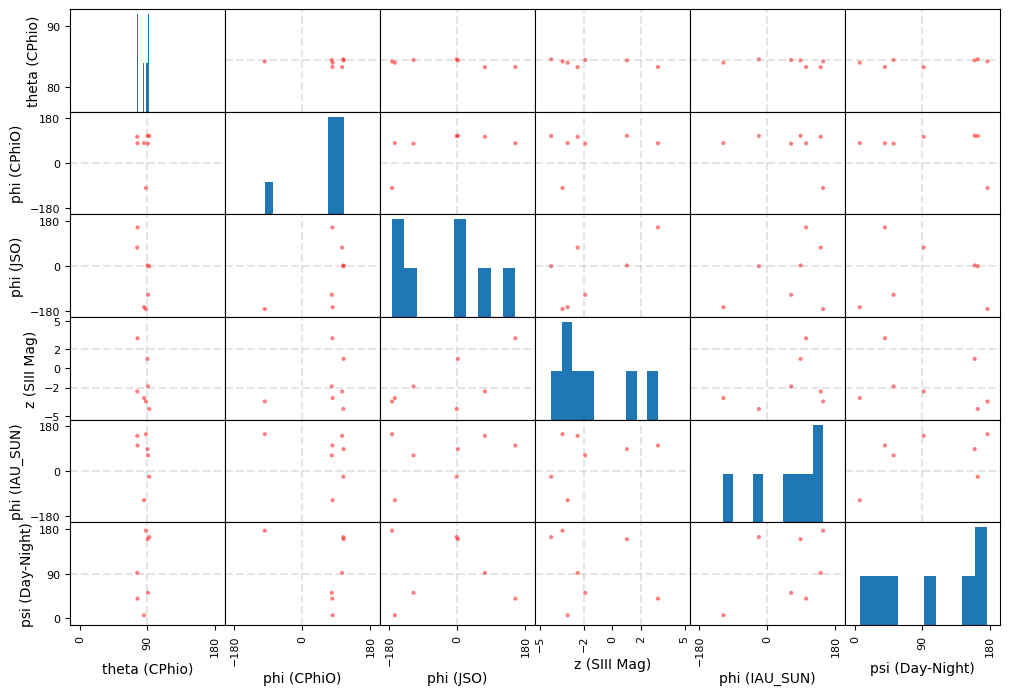

In [3]:
# Scatter Matrix

import numpy as np
import pandas as pd
from functions import *

galileo_wrt_callisto_cphio_CA = closest_approach_data_G("galileo", "callisto", "cphio", "G")
callisto_wrt_jupiter_cphio_CA = closest_approach_data_G("callisto", "jupiter", "cphio", "G")
callisto_wrt_jupiter_JSO_CA = closest_approach_data_G("callisto", "jupiter", "jupsunorb", "G")
sun_wrt_callisto_cphio_CA = closest_approach_data_G("sun", "callisto", "cphio", "G")
callisto_wrt_jupiter_SIII_mag_CA = closest_approach_data_G("callisto", "jupiter", "SIII_mag", "G")
jupiter_wrt_sun_IAU_CA = closest_approach_data_G('jupiter', 'sun', 'IAU_SUN', 'G')

# CA data
#galileo_wrt_callisto_cphio_CA, sun_wrt_callisto_cphio_CA, callisto_wrt_jupiter_JSO_CA, callisto_wrt_jupiter_SIII_mag_CA, jupiter_wrt_sun_IAU_CA = closest_approach_data_5(Galileo, sun_wrt_callisto_cphio, callisto_wrt_jupiter_JSO, callisto_wrt_jupiter_SIII_mag, jupiter_wrt_sun_IAU)


# collects important data from the individual frames

important_info_jcalcphio = np.array(['theta (CPhio)', 'phi (CPhiO)'])
for orbit, vector in galileo_wrt_callisto_cphio_CA.items():
    important_info_i = [vector[5], vector[6]]
    important_info_jcalcphio = np.c_[important_info_jcalcphio, important_info_i]

important_info_caljupjso = np.array(['phi (JSO)'])
for orbit, vector in callisto_wrt_jupiter_JSO_CA.items():
    important_info_i = [vector[6]]
    important_info_caljupjso = np.c_[important_info_caljupjso, important_info_i]

important_info_caljupS3mag = np.array(['z (SIII Mag)'])
for orbit, vector in callisto_wrt_jupiter_SIII_mag_CA.items():
    important_info_i = [vector[3]]
    important_info_caljupS3mag = np.c_[important_info_caljupS3mag, important_info_i]

important_info_jupsunIAU = np.array(['phi (IAU_SUN)'])
for orbit, vector in jupiter_wrt_sun_IAU_CA.items():
    important_info_i = [vector[6]]
    important_info_jupsunIAU = np.c_[important_info_jupsunIAU, important_info_i]

important_info_jsun_daynightside_angle = np.array('psi (Day-Night)')
for i in range(len(galileo_wrt_callisto_cphio_CA)):
    jcal_vector = galileo_wrt_callisto_cphio_CA['CA_orbit%s' %(i+1)]
    suncal_vector = sun_wrt_callisto_cphio_CA['CA_orbit%s' %(i+1)]
    daynightside_angle = [angle_between(jcal_vector[1:4], suncal_vector[1:4])]
    important_info_jsun_daynightside_angle = np.c_[important_info_jsun_daynightside_angle, daynightside_angle]

# collects all important data into one array
important_data = np.r_[important_info_jcalcphio, important_info_caljupjso]
important_data = np.r_[important_data, important_info_caljupS3mag]
important_data = np.r_[important_data, important_info_jupsunIAU]
important_data = np.r_[important_data, important_info_jsun_daynightside_angle]
important_data = np.transpose(important_data)
attributes = important_data[0,:]

# scales z (SIII Mag) to R_J
a = important_data[1:, 3]
a = a.astype(float)
a = a / np.array(R_J)
important_data[1:, 3] = a

# converts angles to degrees
b = important_data[1:, :3].astype(float)
c = important_data[1:, 4:].astype(float)

b = (b * np.array(180))/ np.array(np.pi)
c = (c * np.array(180))/ np.array(np.pi)

important_data[1:, :3] = b
important_data[1:, 4:] = c

# sets limits for the graphs
theta_cphio_lims = [-13.5, 193.5] ; theta_cphio_ticks = [0, 90, 180]
z_S3Mag_lims = [-5.375,5.375] ; z_S3Mag_ticks = [-5, -2, 0, 2, 5]
daynightside_lims = [-13.5, 193.5] ; daynightside_ticks = [0, 90, 180]
phi_lims = [-205, 205] ; phi_ticks = [-180, 0, 180]
lims = [theta_cphio_lims, phi_lims, phi_lims, z_S3Mag_lims, phi_lims, daynightside_lims]
ticks = [theta_cphio_ticks, phi_ticks, phi_ticks, z_S3Mag_ticks, phi_ticks, daynightside_ticks]
# plots and saves all graphs from 2 - 21 orbits to generate gif of coverage progression

all_graphs = -19
final_graph = 0

for k in range(final_graph, 1):
    if k == 0:
        important_data_i = important_data[1:,:]
    else:
        important_data_i = important_data[1:k,:]
    df = pd.DataFrame(important_data_i, columns=attributes)
    df = df.astype(float)
    axs = pd.plotting.scatter_matrix(df, figsize=(12, 8), color='r', alpha=0.8)
    
    # sets limits for graphs
    for i in range(6):
        for j in range(6):
            axs[i,j].set_xlim(lims[j])
            axs[i,j].set_xticks(ticks[j])
            if i != j:
                axs[i,j].set_ylim(lims[i])
                axs[i,j].set_yticks(ticks[i])
    
    # draws grouping lines on graphs
    for i in range(6):
        for j in range(6):
            if i != j:
                if i == 0: 
                    axs[i,j].plot(lims[j], [90, 90], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 1:
                    axs[i,j].plot(lims[j], [0,0], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 2:
                    axs[i,j].plot(lims[j], [0,0], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 3:
                    axs[i,j].plot(lims[j], [-2,-2], color='gray', linestyle='dashed', alpha=0.2)
                    axs[i,j].plot(lims[j], [ 2, 2], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 4:
                    axs[i,j].plot(lims[j], [0,0], color='gray', linestyle='dashed', alpha=0.2)
                elif i == 5:
                    axs[i,j].plot(lims[j], [90, 90], color='gray', linestyle='dashed', alpha=0.2)
                
                if j == 0:
                    axs[i,j].plot([90, 90], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 1:
                    axs[i,j].plot([0,0], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 2:
                    axs[i,j].plot([0,0], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 3:
                    axs[i,j].plot([-2,-2], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                    axs[i,j].plot([ 2, 2], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 4:
                    axs[i,j].plot([0,0], lims[i], color='gray', linestyle='dashed', alpha=0.2)
                elif j == 5:
                    axs[i,j].plot([90, 90], lims[i], color='gray', linestyle='dashed', alpha=0.2)

               
    #plt.savefig('scatter_matrix_%s.png' % (21+k))
    plt.show()